In [85]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import time 
import os
import klib
import joblib


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression

In [86]:
df=pd.read_csv("Housing.csv")

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [88]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [89]:
df_cleaned = klib.data_cleaning(df) 

Shape of cleaned data: (545, 13) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-80.0%)



In [90]:
categorical_col=df.select_dtypes(include=["string","category"]).columns.tolist()
print(f"Categorical columns: \n{", ".join(categorical_col)}")
print(f"\n Total number of categorical columns: {len(categorical_col)}")

numerical_col=df.select_dtypes(include=["int8","int16","int32","int64"]).columns.tolist()
print(f"Numerical columns:\n{", ".join(numerical_col)}")
print(f"\n Total number of numerical columns:: {len(numerical_col)}")

Categorical columns: 


 Total number of categorical columns: 0
Numerical columns:
price, area, bedrooms, bathrooms, stories, parking

 Total number of numerical columns:: 6


In [91]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [93]:
categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
for col in categorical_cols:
    print(f"Cardinality of '{col}': {df[col].nunique()}")

Cardinality of 'mainroad': 2
Cardinality of 'guestroom': 2
Cardinality of 'basement': 2
Cardinality of 'hotwaterheating': 2
Cardinality of 'airconditioning': 2
Cardinality of 'prefarea': 2
Cardinality of 'furnishingstatus': 3


In [94]:
cardinality=df[categorical_cols].nunique()

In [95]:
cardinality

mainroad            2
guestroom           2
basement            2
hotwaterheating     2
airconditioning     2
prefarea            2
furnishingstatus    3
dtype: int64

In [96]:
label_encoder = LabelEncoder()

label_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
for column in label_columns:
    df[column] = label_encoder.fit_transform(df[column])
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [98]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)  


In [99]:
df.duplicated().sum()

0

In [100]:
x = df.drop(columns="price")
y = df["price"]

In [101]:
#Mutual Score
mi_scores = mutual_info_regression(x, y)

mi_scores_df = pd.DataFrame(mi_scores, index=x.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

print(mi_scores_df)

                  MI Score
area              0.271584
bathrooms         0.154858
airconditioning   0.140249
parking           0.129955
bedrooms          0.123642
stories           0.107380
furnishingstatus  0.105846
guestroom         0.085198
mainroad          0.068284
prefarea          0.067513
basement          0.017613
hotwaterheating   0.004987


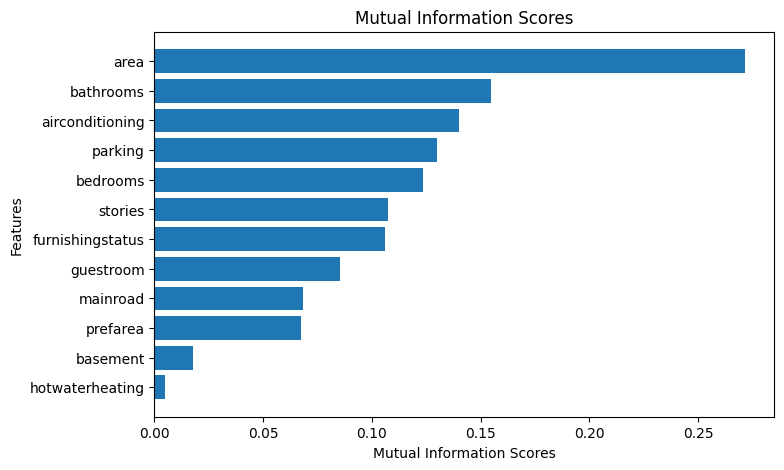

In [102]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)

  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores")
  plt.xlabel("Mutual Information Scores")
  plt.ylabel("Features")
  plt.show()


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores_df["MI Score"])

In [103]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [104]:
model = LinearRegression()

In [105]:

model.fit(x_train, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(x_test)
y_pred

array([2346620.41017362, 3307885.27264494, 4943358.78455695,
       2641947.74706375, 4708264.41070268, 3406110.06934798,
       4013563.22451009, 2898324.62920572, 6578815.16383058,
       2421273.7970433 , 3551464.60674927, 7145185.10824616,
       5358170.87034031, 7260531.24221025, 5600804.93370716,
       6335677.41367624, 7021438.17367802, 4461872.63697472,
       3769887.60312207, 2955016.41578148, 5429714.24082061,
       4603068.47740645, 3048137.62898116, 2588804.65810567,
       3427228.10570008, 7268912.41470939, 4954759.03354751,
       7510739.56714418, 3257272.80697058, 4130262.35836178,
       3931847.49328003, 4816316.06017677, 5048338.5881557 ,
       2763801.26664556, 3055462.44314053, 7909304.88416765,
       4308416.36745432, 7076940.4807988 , 6318431.41494409,
       3860336.84228787, 3381536.16270183, 4011784.5084254 ,
       2314211.92533476, 3666255.62947034, 6633943.09586481,
       5080025.13346592, 6705184.89500425, 2758483.74755246,
       5648580.65216443,

In [107]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(mse)
print(r2)

1273676381288.7886
0.7033145461516307


In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso


# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Lasso Regression (L1 Regularization)
lasso = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso.fit(X_train, y_train)

# Best models
best_lasso = lasso.best_estimator_

# Predictions
y_pred_lasso = best_lasso.predict(X_test)


print("\nBest Lasso Alpha:", lasso.best_params_)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))



Best Lasso Alpha: {'alpha': 0.001}
Lasso MSE: 0.01138466697881523
Lasso R²: 0.9999997058886412


In [111]:
joblib.dump(best_lasso, "predict_model.pkl")

['predict_model.pkl']

In [141]:
# Natijalar
lasso_r2 = 0.9999997058886412

# Natijalarni faylga yozish
with open("results.txt", "w") as file:
    file.write(f"R²_score: {lasso_r2}\n")


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [144]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')